<H1>Dataset Loading and Interaction Extraction</h1>

In [21]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.proteins = []
        self.interactions = []
        self.reconstructedText = ""
        self.words = []
        self.valid = False

    def show(self):
        print(self.text)
        print(self.proteins)
        if len(self.interactions):
            for i in self.interactions:
                print(i)
        print()
        
        
    def processText(self):
        #self.text = self.text.replace("_/_","_ _")
        #self.text = self.text.replace("_:_","_ _")
        #self.text = self.text.replace("_-_","_ _")
        self.text = re.sub("(\_[^_]_)", "_ _", self.text)#regexp to remove things like _:_
        self.text = self.text.replace("(_","_")
        self.text = self.text.replace("_)","_")
    
    def checkValidity(self):
        count = 0
        for w in range(len(self.words)):
            if "__" in self.words[w]:
                count = count +1
        
        if count == len(self.proteins):
            self.valid = True
            #print(self.valid)
        
    
    def reconstructText(self):
        self.words = self.text.split(" ")
        self.checkValidity()
        #print(self.words)
        if self.valid:
            p=0
            for w in range(len(self.words)):
                if "__" in self.words[w]:
                    self.words[w] = self.proteins[p]
                    #self.words[w] = "PROTEIN"+str(p)
                    p=p+1
            #print(self.words)
            #print()
        
    def reassembleSentence(self):
        print(" ".join(self.words))
        
    def fullProcess(self):
        self.processText()
        self.reconstructText()
        

In [22]:
import pickle

with open('datasetTrain.pkl', 'rb') as input1:
    trainSetRaw = pickle.load(input1)
    
with open('datasetTest.pkl', 'rb') as input2:    
    testSetRaw = pickle.load(input2)
    
try:
    print(len(trainSetRaw))
    print(len(testSetRaw))
except NameError:
    print("nope")   

2245
529


In [23]:
def findMaxWords(inputList):
    maxwords = -1 
    for i in inputList:
        if len(i.words)>maxwords:
            maxwords = len(i.words)
    print(maxwords)
    

In [24]:
findMaxWords(trainSetRaw)
findMaxWords(testSetRaw)

93
74


<h1>Maximum Words In Sentence</h1>

We start out with
2245 training examples
529 test examples

mean 24.980894015861573
std 10.856406734698178
80 words: 2770
70 words: 2766
60 words: 2751
50 words: 2697
48 words: 2674
40 words: 2544
30 words: 2086

Selecting for under 48 words we are left with
2186 training examples
511 test examples


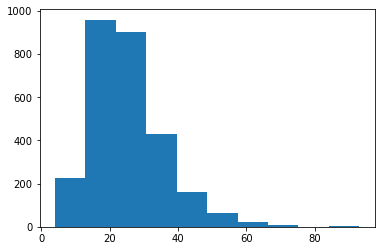

In [25]:
print("We start out with")

print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

print()

allSet = [len(x.words) for x in trainSetRaw+testSetRaw]

from matplotlib import pyplot as plt 
import numpy as np  

print("mean",np.mean(allSet))

print("std",np.std(allSet))

plt.hist(allSet)



selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=80 ]

print("80 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=70 ]

print("70 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=60 ]

print("60 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=50 ]

print("50 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=48 ]

print("48 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=40 ]

print("40 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=30 ]

print("30 words:",len(selectedSet))


#HERE
maxSentenceWords = 50

trainSetRaw = [x for x in trainSetRaw if len(x.words)<=maxSentenceWords]
testSetRaw = [x for x in testSetRaw if len(x.words)<=maxSentenceWords]


print()
print("Selecting for under 48 words we are left with")
print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

In [26]:
print(trainSetRaw[0])
print()

print(trainSetRaw[0].text)
print()

print(trainSetRaw[0].words)
print()

print(trainSetRaw[0].proteins)



print(len('protein0'))


Cytokines measurements during _________ treatment showed a trend to decreasing levels of ____ at 4, 12, and 24 weeks.

['Cytokines', 'measurements', 'during', 'PROTEIN0', 'treatment', 'showed', 'a', 'trend', 'to', 'decreasing', 'levels', 'of', 'PROTEIN1', 'at', '4,', '12,', 'and', '24', 'weeks.']

['PROTEIN0', 'PROTEIN1']
8


In [27]:
import string
string.ascii_letters

import random
random.choice(string.ascii_letters)

def genRandomWord():
    word = ''
    for letter in range(random.randint(3,9)):
        word+=random.choice(string.ascii_letters)
        
    return word
        

for i,v in enumerate(range(10)):
    print(i,genRandomWord())

0 qVost
1 NCQPQMCtK
2 vVBdd
3 Rki
4 dhL
5 mIrIiD
6 HXEqvQsv
7 CcPaZEVBz
8 onBCpi
9 iyyOohiyY


In [28]:
import re

re.sub('PROTEIN[0-9]',genRandomWord(),'PROTEINA PROTEIN1 PROTEIN2 is a sentence')




'PROTEINA ISMZBip ISMZBip is a sentence'

In [29]:
trainSet = []
trainLabel = []

for example in trainSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            trainLabel = trainLabel + [1]
            #print("HIT")
        else:
            trainLabel = trainLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        sentence = re.sub('PROTEIN[0-9]',genRandomWord(),sentence)
        
        #print(sentence)
        #print()
        #print()
        
        trainSet = trainSet + [sentence]    
            
    #print()
    
    
print(len(trainSet))
print(len(trainLabel))

10394
10394


In [30]:
testSet = []
testLabel = []

for example in testSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            testLabel = testLabel + [1]
            #print("HIT")
        else:
            testLabel = testLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0],'PROTEINA')
        sentence = sentence.replace(interaction[1],'PROTEINB')
        sentence = re.sub('PROTEIN[0-9]',genRandomWord(),sentence)
        
        #print(sentence)
        #print()
        #print()
        
        testSet = testSet + [sentence]    
            
    #print()
    
    
print(len(testSet))
print(len(testLabel))

2336
2336


In [31]:
for t in trainSet:
    print(t)
    print()

Cytokines measurements during PROTEINA treatment showed a trend to decreasing levels of PROTEINB at 4, 12, and 24 weeks.

Levels of PROTEINA were slightly increased following PROTEINB treatment (P = 0.09).

This study describes the distributions of PROTEINA as well as mRNAs for PROTEINB AWK collagen types II AWK and III AWK in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for taLivFc PROTEINB collagen types II taLivFc and III taLivFc in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for qlePnyIo qlePnyIo collagen types II PROTEINB and III qlePnyIo in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of PROTEINA as well as mRNAs for YWGb YWGb collagen types II YWGb and III PROTEINB in a growing "cartilage cap" of osteochondroma.

This study describes the distributions of AQEUeJNA as well as mRNAs for PROTEINA PROTEINB c

oQidD interaction PROTEINA PROTEINB represents a novel variant of a oQidD in which receptor can also serve as substrate. ( ABSTRACT TRUNCATED AT 250 WORDS )

JUiLUadQF interaction PROTEINA JUiLUadQF represents a novel variant of a PROTEINB in which receptor can also serve as substrate. ( ABSTRACT TRUNCATED AT 250 WORDS )

UfXhpinJ interaction UfXhpinJ PROTEINA represents a novel variant of a PROTEINB in which receptor can also serve as substrate. ( ABSTRACT TRUNCATED AT 250 WORDS )

PROTEINA PROTEINB a desmosomal component lacking a transmembrane domain, has been implicated in this interaction, although most studies have been conducted with cells that contain few or no desmosomes, and efforts to demonstrate direct interactions between desmoplakin and intermediate filaments have not been successful.

We show that the carboxy terminal "tail" of PROTEINA associates directly with the amino terminal "head" of type II epidermal keratins, including PROTEINB IXZ IXZ and IXZ

We show that the c

PROTEINA is shown to interact with the largest subunit dNjWyRk of human dNjWyRk through its central region and with multiple activators--including dNjWyRk dNjWyRk dNjWyRk dNjWyRk adenoviral dNjWyRk and human immunodeficiency virus-type 1 PROTEINB proteins--through a distinct amino-terminal domain.

tOYRiL is shown to interact with the largest subunit PROTEINA of human PROTEINB through its central region and with multiple activators--including tOYRiL tOYRiL tOYRiL tOYRiL adenoviral tOYRiL and human immunodeficiency virus-type 1 tOYRiL proteins--through a distinct amino-terminal domain.

PxnPcHONY is shown to interact with the largest subunit PROTEINA of human PxnPcHONY through its central region and with multiple activators--including PROTEINB PxnPcHONY PxnPcHONY PxnPcHONY adenoviral PxnPcHONY and human immunodeficiency virus-type 1 PxnPcHONY proteins--through a distinct amino-terminal domain.

ViSw is shown to interact with the largest subunit PROTEINA of human ViSw through its central


fAjzBlmh and PROTEINA associated with fAjzBlmh and gamma c, respectively; fAjzBlmh induced fAjzBlmh fAjzBlmh and increased PROTEINB c associations.

RSKCneGXB and RSKCneGXB associated with PROTEINA and gamma c, respectively; PROTEINB induced RSKCneGXB RSKCneGXB and increased RSKCneGXB c associations.

sfSvDzU and sfSvDzU associated with PROTEINA and gamma c, respectively; sfSvDzU induced PROTEINB sfSvDzU and increased sfSvDzU c associations.

zosNSxEFo and zosNSxEFo associated with PROTEINA and gamma c, respectively; zosNSxEFo induced zosNSxEFo PROTEINB and increased zosNSxEFo c associations.

HOzuTf and HOzuTf associated with PROTEINA and gamma c, respectively; HOzuTf induced HOzuTf HOzuTf and increased PROTEINB c associations.

pxnUxB and pxnUxB associated with pxnUxB and gamma c, respectively; PROTEINA induced PROTEINB pxnUxB and increased pxnUxB c associations.

vZKRq and vZKRq associated with vZKRq and gamma c, respectively; PROTEINA induced vZKRq PROTEINB and increased vZKRq c a

In addition, we show that in extracts depleted of tTSPrhxn and PROTEINA factors, transcription from the U1 promoter is restored by recombinant tTSPrhxn but not by PROTEINB or tTSPrhxn indicating that transcription of class II snRNA genes requires a tTSPrhxn complex different from the one used for mRNA-encoding genes.

In addition, we show that in extracts depleted of BXjo and PROTEINA factors, transcription from the U1 promoter is restored by recombinant BXjo but not by BXjo or PROTEINB indicating that transcription of class II snRNA genes requires a BXjo complex different from the one used for mRNA-encoding genes.

In addition, we show that in extracts depleted of wfsroe and PROTEINA factors, transcription from the U1 promoter is restored by recombinant wfsroe but not by wfsroe or wfsroe indicating that transcription of class II snRNA genes requires a PROTEINB complex different from the one used for mRNA-encoding genes.

In addition, we show that in extracts depleted of vBu and vBu fa

The increased binding affinity of PROTEINA appears to be due to its ability to cross-link two PROTEINB molecules on the biosensor surface.

Studies of the PROTEINA ternary complex formation demonstrated that the reduced biological potency of PROTEINB resulted from a decreased ability of the ytXPOs ytXPOs complex to couple with the soluble portion of ytXPOs

Studies of the PROTEINA ternary complex formation demonstrated that the reduced biological potency of DXaa resulted from a decreased ability of the PROTEINB DXaa complex to couple with the soluble portion of DXaa

Studies of the PROTEINA ternary complex formation demonstrated that the reduced biological potency of LdnWAmi resulted from a decreased ability of the LdnWAmi PROTEINB complex to couple with the soluble portion of LdnWAmi

Studies of the PROTEINA ternary complex formation demonstrated that the reduced biological potency of wKZA resulted from a decreased ability of the wKZA wKZA complex to couple with the soluble portion of


In addition, PROTEINA phosphorylated oVoWblim at sites different from those phosphorylated by PROTEINB

In addition, kmLypb phosphorylated PROTEINA at sites different from those phosphorylated by PROTEINB

In mammalian cells treated with either erythropoietin or interferon-gamma, a small fraction of PROTEINA coimmunoprecipitated with PROTEINB in lysates of cells in which laTaf was activated as judged by its state of tyrosine phosphorylation.

In mammalian cells treated with either erythropoietin or interferon-gamma, a small fraction of PROTEINA coimmunoprecipitated with Iasgosx in lysates of cells in which PROTEINB was activated as judged by its state of tyrosine phosphorylation.

In mammalian cells treated with either erythropoietin or interferon-gamma, a small fraction of IcoTQkG coimmunoprecipitated with PROTEINA in lysates of cells in which PROTEINB was activated as judged by its state of tyrosine phosphorylation.

Taken together, these data suggest that PROTEINA and PROTEINB coop


We show that the physical interaction between qDWOZp and PROTEINA a coactivator for qDWOZp is not sufficient for repression of PROTEINB transcription.

We show that the physical interaction between ZbnDMeX and ZbnDMeX a coactivator for PROTEINA is not sufficient for repression of PROTEINB transcription.

Repression of PROTEINA transcription may be accomplished through direct physical interaction between PROTEINB and this activator.

In contrast, physical interaction is not necessary for PROTEINA to repress PROTEINB and tPO transcription.

In contrast, physical interaction is not necessary for PROTEINA to repress LQyU and PROTEINB transcription.

In contrast, physical interaction is not necessary for pMllUEi to repress PROTEINA and PROTEINB transcription.

Proto-oncoprotein PROTEINA interacts with PROTEINB in activated thymocytes and peripheral T cells.

The molecular adapter PROTEINA is rapidly tyrosine phosphorylated following stimulation through the PROTEINB and associates with hmtp

After in vitro labelling of isolated rat liver nuclei, the following ADP-ribosylated and unmodified ZONxk were identified by HPLC and gel electrophoresis: ZONxk ZONxk four PROTEINA PROTEINB subfractions, ZONxk ZONxk ZONxk ZONxk oxidized ZONxk ZONxk ZONxk ZONxk PROTEINA PROTEINB ZONxk ZONxk three ZONxk ZONxk variants and ZONxk ZONxk

After in vitro labelling of isolated rat liver nuclei, the following ADP-ribosylated and unmodified rzUvYkP were identified by HPLC and gel electrophoresis: rzUvYkP rzUvYkP four PROTEINA rzUvYkP subfractions, PROTEINB rzUvYkP rzUvYkP rzUvYkP oxidized rzUvYkP rzUvYkP rzUvYkP rzUvYkP PROTEINA rzUvYkP PROTEINB rzUvYkP three rzUvYkP rzUvYkP variants and rzUvYkP rzUvYkP

After in vitro labelling of isolated rat liver nuclei, the following ADP-ribosylated and unmodified lCNsHyZ were identified by HPLC and gel electrophoresis: lCNsHyZ lCNsHyZ four PROTEINA lCNsHyZ subfractions, lCNsHyZ PROTEINB lCNsHyZ lCNsHyZ oxidized lCNsHyZ lCNsHyZ lCNsHyZ lCNsHyZ PROTEINA lCNs

As a consequence, in the presence of ebBAW ebBAW low amounts of PROTEINA promote extensive ebBAW assembly off of the pool of ebBAW PROTEINB complex.

As a consequence, in the presence of RfCsYo RfCsYo low amounts of RfCsYo promote extensive PROTEINA assembly off of the pool of PROTEINB RfCsYo complex.

As a consequence, in the presence of hWEQJUlt hWEQJUlt low amounts of hWEQJUlt promote extensive PROTEINA assembly off of the pool of hWEQJUlt PROTEINB complex.

As a consequence, in the presence of jdV jdV low amounts of jdV promote extensive jdV assembly off of the pool of PROTEINA PROTEINB complex.

How PROTEINA promotes PROTEINB filament assembly in the presence of arFqvq

How PROTEINA promotes pBxhoN filament assembly in the presence of PROTEINB

How KabY promotes PROTEINA filament assembly in the presence of PROTEINB

The role of PROTEINA in the regulation of PROTEINB assembly has been reexamined.

When barbed ends are capped, PROTEINA simply sequesters globular PROTEINB

PROTEINA 

Both tyrosine phosphorylation and association of PROTEINA with HvdyQkBX were inhibited by tyrphostin, a specific inhibitor of the HvdyQkBX HvdyQkBX whereas dissociation of PROTEINB from HvdyQkBX was not.

Both tyrosine phosphorylation and association of PROTEINA with CddpCs were inhibited by tyrphostin, a specific inhibitor of the CddpCs CddpCs whereas dissociation of CddpCs from PROTEINB was not.

Both tyrosine phosphorylation and association of cgVtUa with PROTEINA were inhibited by tyrphostin, a specific inhibitor of the PROTEINB cgVtUa whereas dissociation of cgVtUa from cgVtUa was not.

Both tyrosine phosphorylation and association of JRlXeNti with PROTEINA were inhibited by tyrphostin, a specific inhibitor of the JRlXeNti PROTEINB whereas dissociation of JRlXeNti from JRlXeNti was not.

Both tyrosine phosphorylation and association of UUeHQLyBr with PROTEINA were inhibited by tyrphostin, a specific inhibitor of the UUeHQLyBr UUeHQLyBr whereas dissociation of PROTEINB from UUeHQLy

To detect the expression of apoptosis-related molecules, ripfAnRwT protection assay was used with specific antisense RNA probes for ripfAnRwT ripfAnRwT PROTEINA ripfAnRwT ripfAnRwT ripfAnRwT ripfAnRwT PROTEINB ripfAnRwT and ripfAnRwT

To detect the expression of apoptosis-related molecules, szizc protection assay was used with specific antisense RNA probes for szizc szizc PROTEINA szizc szizc szizc szizc szizc PROTEINB and szizc

To detect the expression of apoptosis-related molecules, PROTEINB protection assay was used with specific antisense RNA probes for HtwKrEld HtwKrEld PROTEINA HtwKrEld HtwKrEld HtwKrEld HtwKrEld HtwKrEld HtwKrEld and PROTEINB

To detect the expression of apoptosis-related molecules, HCakSbuWZ protection assay was used with specific antisense RNA probes for HCakSbuWZ HCakSbuWZ HCakSbuWZ PROTEINA PROTEINB HCakSbuWZ HCakSbuWZ HCakSbuWZ HCakSbuWZ and HCakSbuWZ

To detect the expression of apoptosis-related molecules, ryfGaC protection assay was used with specific a

Expression of OTyJy or OTyJy was sufficient to activate OTyJy PROTEINA by promoting the formation of high-molecular-weight complexes lacking the OTyJy PROTEINB as has been described, following estrogen treatment.

Expression of KZOzCiyc or KZOzCiyc was sufficient to activate KZOzCiyc KZOzCiyc by promoting the formation of high-molecular-weight complexes lacking the PROTEINA PROTEINB as has been described, following estrogen treatment.

Expression of PROTEINA PROTEINB and yiwH in normal ovarian surface epithelium and epithelial ovarian cancers.

Expression of PROTEINA dblNhHjM and PROTEINB in normal ovarian surface epithelium and epithelial ovarian cancers.

Expression of ZxfzEtxhP PROTEINA and PROTEINB in normal ovarian surface epithelium and epithelial ovarian cancers.

Features studied were PROTEINA microtubules, PROTEINB and pqtw using immunofluorescence, sodium dodecyl sulfate-polyacrylamide gel electrophoresis, and immunoblotting; permeability of the cell sheet; wound healing; and

However, upon treatment with DMSO, cytoplasmic PROTEINA filaments were disrupted and intranuclear rod structures containing PROTEINB and zxp were apparently larger and thicker in cells overexpressing zxp than in normal cells.

However, upon treatment with DMSO, cytoplasmic PROTEINA filaments were disrupted and intranuclear rod structures containing AEP and PROTEINB were apparently larger and thicker in cells overexpressing AEP than in normal cells.

However, upon treatment with DMSO, cytoplasmic PROTEINA filaments were disrupted and intranuclear rod structures containing qVCw and qVCw were apparently larger and thicker in cells overexpressing PROTEINB than in normal cells.

However, upon treatment with DMSO, cytoplasmic QuoNMEe filaments were disrupted and intranuclear rod structures containing PROTEINA and PROTEINB were apparently larger and thicker in cells overexpressing QuoNMEe than in normal cells.

However, upon treatment with DMSO, cytoplasmic zJBUVuKhh filaments were disrupted 


In isolated hearts, PD 81,723 alone produced only a small stimulus to His bundle (S-H) interval prolongation of 1.5 to 4 msec, which was completely reversed by the PROTEINA antagonist 8-cyclopentyltheophylline and PROTEINB

In localization studies with mammalian cells, all fusion proteins showed the localization expected for PROTEINA in areas of high PROTEINB dynamics, such as leading lamellae and ruffles induced by bDVAKcw

In localization studies with mammalian cells, all fusion proteins showed the localization expected for PROTEINA in areas of high qTUFuO dynamics, such as leading lamellae and ruffles induced by PROTEINB

In localization studies with mammalian cells, all fusion proteins showed the localization expected for dHZbe in areas of high PROTEINA dynamics, such as leading lamellae and ruffles induced by PROTEINB

In order to clarify PROTEINA regulation of PROTEINB assembly in muscle cells, GUMDYfwEp tagged with fluorescence dyes was introduced into C2 myoblasts by a micro i

Lethality of the XWy XWy and PROTEINA XWy double mutants can also be rescued by mutations in the DNA damage checkpoint functions XWy XWy XWy and XWy indicating that the XWy PROTEINB and XWy XWy mutant combinations lead to an intermediate that is sensed by these checkpoint functions.

Lethality of the PROTEINB MccpMw and PROTEINA MccpMw double mutants can also be rescued by mutations in the DNA damage checkpoint functions MccpMw MccpMw MccpMw and MccpMw indicating that the MccpMw MccpMw and PROTEINB MccpMw mutant combinations lead to an intermediate that is sensed by these checkpoint functions.

Lethality of the ycbOeqiME PROTEINB and PROTEINA ycbOeqiME double mutants can also be rescued by mutations in the DNA damage checkpoint functions ycbOeqiME ycbOeqiME ycbOeqiME and ycbOeqiME indicating that the ycbOeqiME ycbOeqiME and ycbOeqiME PROTEINB mutant combinations lead to an intermediate that is sensed by these checkpoint functions.

Lethality of the txsg txsg and txsg PROTEINA double mu

One, kSHRgR (also called PROTEINA binds to kSHRgR kSHRgR but not to kSHRgR another, kSHRgR binds to the kSHRgR kSHRgR but not to kSHRgR PROTEINB and the third, kSHRgR binds weakly to both receptors.

One, PROTEINB (also called PROTEINA binds to cKKn cKKn but not to cKKn another, cKKn binds to the cKKn cKKn but not to cKKn cKKn and the third, PROTEINB binds weakly to both receptors.

One, xrcgwfTv (also called xrcgwfTv binds to PROTEINA PROTEINB but not to xrcgwfTv another, xrcgwfTv binds to the xrcgwfTv xrcgwfTv but not to xrcgwfTv xrcgwfTv and the third, xrcgwfTv binds weakly to both receptors.

One, TrMUb (also called TrMUb binds to PROTEINA TrMUb but not to PROTEINB another, TrMUb binds to the TrMUb TrMUb but not to TrMUb TrMUb and the third, TrMUb binds weakly to both receptors.

One, itmcxuZL (also called itmcxuZL binds to PROTEINA itmcxuZL but not to itmcxuZL another, PROTEINB binds to the itmcxuZL itmcxuZL but not to itmcxuZL itmcxuZL and the third, itmcxuZL binds weakly to both

Semiserial sections were subjected to immunohistochemical staining with antibodies to ttecdH ttecdH PROTEINA and ttecdH isoforms: ttecdH ttecdH and PROTEINB

Semiserial sections were subjected to immunohistochemical staining with antibodies to AkTgGt AkTgGt AkTgGt and PROTEINA isoforms: PROTEINB AkTgGt and AkTgGt

Semiserial sections were subjected to immunohistochemical staining with antibodies to nobcTfORP nobcTfORP nobcTfORP and PROTEINA isoforms: nobcTfORP PROTEINB and nobcTfORP

Semiserial sections were subjected to immunohistochemical staining with antibodies to ephkk ephkk ephkk and PROTEINA isoforms: ephkk ephkk and PROTEINB

Semiserial sections were subjected to immunohistochemical staining with antibodies to MuMG MuMG MuMG and MuMG isoforms: PROTEINA PROTEINB and MuMG

Semiserial sections were subjected to immunohistochemical staining with antibodies to zWEREVhO zWEREVhO zWEREVhO and zWEREVhO isoforms: PROTEINA zWEREVhO and PROTEINB

Semiserial sections were subjected to immu

The idnnMYhc component of the herpes simplex virus PROTEINA complex stimulates primer synthesis by a subassembly of the idnnMYhc and PROTEINB components.

The HilhBkUzm component of the herpes simplex virus HilhBkUzm complex stimulates primer synthesis by a subassembly of the PROTEINA and PROTEINB components.

The herpes simplex virus type 1 (HSV) PROTEINA PROTEINB and TQu proteins form a helicase-primase complex in infected cells.

The herpes simplex virus type 1 (HSV) PROTEINA EVChJCiC and PROTEINB proteins form a helicase-primase complex in infected cells.

The herpes simplex virus type 1 (HSV) yWk PROTEINA and PROTEINB proteins form a helicase-primase complex in infected cells.

The PROTEINA region is distinct from major PROTEINB mAb epitopes on the human URg URg molecule.

The PROTEINA region is distinct from major PufnGEmu mAb epitopes on the human PROTEINB PufnGEmu molecule.

The PROTEINA region is distinct from major UQU mAb epitopes on the human UQU PROTEINB molecule.

The qwd


The results indicate that (a) PROTEINA and LbRF differ in their nuclear translocation and complexing with LbRF and PROTEINB (b) LbRF transactivation is preferentially driven by LbRF and (c) the cytoplasmic partners of LbRF LbRF and LbRF can sequester it to the cytoplasm and inhibit its transcriptional activity.

The results indicate that (a) PROTEINA and gzkZyfJj differ in their nuclear translocation and complexing with gzkZyfJj and gzkZyfJj (b) PROTEINB transactivation is preferentially driven by gzkZyfJj and (c) the cytoplasmic partners of gzkZyfJj gzkZyfJj and gzkZyfJj can sequester it to the cytoplasm and inhibit its transcriptional activity.

The results indicate that (a) PROTEINA and NrPFSTVs differ in their nuclear translocation and complexing with NrPFSTVs and NrPFSTVs (b) NrPFSTVs transactivation is preferentially driven by PROTEINB and (c) the cytoplasmic partners of NrPFSTVs NrPFSTVs and NrPFSTVs can sequester it to the cytoplasm and inhibit its transcriptional activity.

T

To determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of CbjdE CbjdE CbjdE the PROTEINA PROTEINB CbjdE and CbjdE and markers of differentiating podocytes in developing human kidneys was investigated by immunohistochemistry.

To determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of maxiav maxiav maxiav the PROTEINA maxiav PROTEINB and maxiav and markers of differentiating podocytes in developing human kidneys was investigated by immunohistochemistry.

To determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of Llqpc Llqpc Llqpc the PROTEINA Llqpc Llqpc and PROTEINB and markers of differentiating podocytes in developing human kidneys was investigated by immunohistochemistry.

To determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of wfI wfI wfI the wfI PROTEINA PROTEI


We have shown that the COlJseHT PROTEINA and COlJseHT are potential targets of the COlJseHT family COlJseHT and bind to an PROTEINB COlJseHT at their proline-rich FH1 domains to regulate reorganization of the COlJseHT cytoskeleton in the yeast Saccharomyces cerevisiae.

We have shown that the vFlfcQx PROTEINA and vFlfcQx are potential targets of the vFlfcQx family vFlfcQx and bind to an vFlfcQx PROTEINB at their proline-rich FH1 domains to regulate reorganization of the vFlfcQx cytoskeleton in the yeast Saccharomyces cerevisiae.

We have shown that the TNiZWRJP PROTEINA and TNiZWRJP are potential targets of the TNiZWRJP family TNiZWRJP and bind to an TNiZWRJP TNiZWRJP at their proline-rich FH1 domains to regulate reorganization of the PROTEINB cytoskeleton in the yeast Saccharomyces cerevisiae.

We have shown that the msGlTqny msGlTqny and PROTEINA are potential targets of the PROTEINB family msGlTqny and bind to an msGlTqny msGlTqny at their proline-rich FH1 domains to regulate reorg


The aim of this study was to investigate the effects of hCG, hCG plus HFrtG and PROTEINA on [3H] PROTEINB (IP) formations in porcine myometrial cells obtained from ovariectomized and cyclic gilts

There was also a very significant increase of PROTEINA after the addition of 1000 mU hCG (p < 0.001) and PROTEINB and CPpzn when 1000 mU hCG plus CPpzn were added (p < 0.001 and p < 0.01, respectively)

There was also a very significant increase of PROTEINA after the addition of 1000 mU hCG (p < 0.001) and MeYK and PROTEINB when 1000 mU hCG plus MeYK were added (p < 0.001 and p < 0.01, respectively)

There was also a very significant increase of PROTEINA after the addition of 1000 mU hCG (p < 0.001) and KRN and KRN when 1000 mU hCG plus PROTEINB were added (p < 0.001 and p < 0.01, respectively)

There was also a very significant increase of ocONsA after the addition of 1000 mU hCG (p < 0.001) and PROTEINA and PROTEINB when 1000 mU hCG plus ocONsA were added (p < 0.001 and p < 0.01, respectiv


vHniKI treatment of fetal guinea pig brain cultures substantially reduced the amount of PROTEINA and PROTEINB in the medium but had no effect on sAPPalpha

When this parental line was treated with PROTEINA PROTEINB AiuwSu and sAPPbeta decreased to levels similar to those observed in the mutant line, and the mutant line was resistant to these effects of AiuwSu

When this parental line was treated with PROTEINA oBp PROTEINB and sAPPbeta decreased to levels similar to those observed in the mutant line, and the mutant line was resistant to these effects of oBp

When this parental line was treated with PROTEINA xOLI xOLI and sAPPbeta decreased to levels similar to those observed in the mutant line, and the mutant line was resistant to these effects of PROTEINB

When this parental line was treated with URXQ PROTEINA PROTEINB and sAPPbeta decreased to levels similar to those observed in the mutant line, and the mutant line was resistant to these effects of URXQ

When this parental line was t


PROTEINA also contributes to the expression of PROTEINB a putative membrane-bound glucosyl transferase that is partially controlled by the IvZQUyA stress response sigma factor.

PROTEINA also contributes to the expression of AKqMtFP a putative membrane-bound glucosyl transferase that is partially controlled by the PROTEINB stress response sigma factor.

XxFGNgLOA also contributes to the expression of PROTEINA a putative membrane-bound glucosyl transferase that is partially controlled by the PROTEINB stress response sigma factor.

Transcriptional studies showed that PROTEINA is strongly induced in response to heat, ethanol and salt stress or after starvation for glucose in a PROTEINB manner.

Furthermore, PROTEINA and PROTEINB seemed to be induced after phosphate starvation in the wild type in a jxHSyB manner and in the sigB mutant probably via jxHSyB

Furthermore, PROTEINA and QgXcHi seemed to be induced after phosphate starvation in the wild type in a PROTEINB manner and in the sigB 

In [32]:
print(len(trainSet))
print(len(testSet))

uniqueTrain = set()
uniqueTest = set()


uniqueTrain.update(trainSet)
uniqueTest.update(testSet)


print(len(uniqueTrain),len(uniqueTest))

10394
2336
10393 2336


<H1>Imports</h1>

In [33]:
import os
import re
import time
import numpy as np
import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


from keras import regularizers

from keras.models import Sequential, Model

from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Reshape
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Lambda
from keras.layers.merge import concatenate


from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from keras.optimizers import SGD, Adam, RMSprop



import spacy
import scispacy
import nltk


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

nlp = spacy.load("en_core_sci_lg")


C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-

<h1>Preprocessing Functions</h1>

In [34]:
def word2vec(x):
    return nlp(x).vector

word2vecLength = word2vec('one').shape[0]

In [35]:
def padWithZeroes(matrix,rows,cols):
    result = np.zeros((rows,cols))
    result[:matrix.shape[0],:matrix.shape[1]] = matrix
    return result


matrix = np.random.rand(11,word2vecLength)

padded = padWithZeroes(matrix,maxSentenceWords,word2vecLength)

print(padded.shape)



(50, 200)


In [36]:
#A GENERAL FUNCTION TO TAKE STRINGS AND CLEAN, SPLIT AND CONVERT TO NUMPY ARRAY
def processString(sentence,maxWords):
    text=sentence.lower()
    tokens = nltk.word_tokenize(text)
    #punctuation
    #origina: tokens=nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(text)
    tokens=nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(text)
    stopwords=set(nltk.corpus.stopwords.words('english'))
    tokens=list(filter(lambda word: not word in stopwords,tokens))
    #lemmatize
    #tokens = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in tokens]
    #stemming
    #tokens = [nltk.stem.SnowballStemmer('english').stem(word) for word in tokens]
    #return word2vec( ' '.join(tokens) )
    
    result = np.array(list(map(word2vec, tokens)))
    if len(tokens)<=maxWords:    
        result = padWithZeroes(result,maxWords,result.shape[1])
    
    '''
    for token in tokens:
        if 'result' in locals():
            result = np.concatenate((result,[word2vec(token)]),axis=0)
        else:
            result = [word2vec(token)]
    
    result = padWithZeroes(result,maxWords,result.shape[1])
    '''
    
    #result = ' '.join(tokens) 
    return result
    

stringToClean="being anne:the hero's nests' has - apples/pears,bears, and\cats. which-way or does she? she's a fiend! (everything i<br />i a)"

resultVectors=processString(stringToClean,maxSentenceWords)

print(type(resultVectors))
#print(resultVectors)
print(resultVectors.shape)




<class 'numpy.ndarray'>
(50, 200)


<h1>scispacy embedding</h1>

In [37]:
def eliminateOverMaxWordExamples(dataset,labels,maxWords):

    aboveWordLimitIndex = []

    for index,value in enumerate(dataset):
        if value.shape[0]>maxSentenceWords:
            print(index)
            print(value.shape)
            aboveWordLimitIndex +=[index]

    dataset = [t for t in dataset if t.shape[0]<=maxSentenceWords]

    labels = [v for i,v in enumerate(labels) if i not in aboveWordLimitIndex]
    
    return dataset, labels
'''
t,l = eliminateOverMaxWordExamples(trainSet,trainLabel,50)

print(len(trainSet),len(trainLabel))


print(len(t),len(l))

'''

'\nt,l = eliminateOverMaxWordExamples(trainSet,trainLabel,50)\n\nprint(len(trainSet),len(trainLabel))\n\n\nprint(len(t),len(l))\n\n'

In [38]:
if os.path.isfile('padded_training_docs'+str(maxSentenceWords)+'.npy') and os.path.isfile('trainLabel'+str(maxSentenceWords)+'.npy'):
    padded_training_docs = np.load('padded_training_docs'+str(maxSentenceWords)+'.npy')
    trainLabel = np.load('trainLabel'+str(maxSentenceWords)+'.npy')
else:
    trainSet = [processString(t,maxSentenceWords) for t in trainSet]
    #padded_training_docs = [t for t in trainSet if t.shape[0]<=maxSentenceWords]
    padded_training_docs, trainLabel = eliminateOverMaxWordExamples(trainSet,trainLabel,maxSentenceWords)
    np.save('padded_training_docs'+str(maxSentenceWords)+'.npy', padded_training_docs)
    np.save('trainLabel'+str(maxSentenceWords)+'.npy', trainLabel)
    
if os.path.isfile('padded_test_docs'+str(maxSentenceWords)+'.npy') and os.path.isfile('testLabel'+str(maxSentenceWords)+'.npy'):
    padded_test_docs = np.load('padded_test_docs'+str(maxSentenceWords)+'.npy')
    testLabel = np.load('testLabel'+str(maxSentenceWords)+'.npy')
else:
    testSet = [processString(t,maxSentenceWords) for t in testSet]
    #padded_test_docs = [t for t in testSet if t.shape[0]<=maxSentenceWords]
    padded_test_docs, testLabel = eliminateOverMaxWordExamples(testSet,testLabel,maxSentenceWords)
    np.save('padded_test_docs'+str(maxSentenceWords)+'.npy', padded_test_docs)
    np.save('testLabel'+str(maxSentenceWords)+'.npy', testLabel)
    
    


In [39]:
padded_training_docs = np.array(padded_training_docs)
trainLabel = np.array(trainLabel)
padded_test_docs = np.array(padded_test_docs)
testLabel = np.array(testLabel)

In [40]:
print("done")
print(len(padded_training_docs),len(trainLabel))
print(len(padded_test_docs),len(testLabel))

done
10391 10391
2336 2336


In [48]:
print(len(padded_training_docs),len(padded_test_docs))
print()

uniqueTrain = [np.unique(subarr) for subarr in padded_training_docs]
uniqueTest = [np.unique(subarr) for subarr in padded_test_docs]

print(len(uniqueTrain),len(uniqueTest))

10391 2336

10391 2336


In [66]:
nlp("proteina").vector==nlp("proteinB").vector



print(nlp(genRandomWord()).vector)



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


<h1>Functional API</h1>

In [20]:
sentence_length = maxSentenceWords
wordvec_length = word2vecLength

denseResults = []
CNNResults = []
LSTMResults = []



<h4>200 epochs</h4>

In [21]:
epochs_to_run = 200
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

In [22]:
#https://keras.io/getting-started/functional-api-guide/

sentence_length = maxSentenceWords
wordvec_length = word2vecLength


input_layer = Input(shape=(sentence_length,wordvec_length))

x = Flatten()(input_layer)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

dense_model_200_epochs = Model(inputs = input_layer, outputs = output_layer)

dense_model_200_epochs.summary()


#compile
dense_model_200_epochs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
dense_model_200_epochs.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = dense_model_200_epochs.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = dense_model_200_epochs.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 200)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              20002000  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10391/10391 [==============================] - 9s 827us/step - loss: 0.6037 - accuracy: 0.7108
Epoch 3/200
10391/10391 [==============================] - 9s 826us/step - loss: 0.6025 - accuracy: 0.7108
Epoch 4/200
10391/10391 [==============================] - 9s 826us/step - loss: 0.6021 - accuracy: 0.7108
Epoch 5/200
10391/10391 [==============================] - 9s 821us/step - loss: 0.6022 - accuracy: 0.7108
Epoch 6/200
10391/10391 [==============================] - 9s 826us/step - loss: 0.6023 - accuracy: 0.7108
Epoch 7/200
10391/10391 [==============================] - 9s 821us/step - loss: 0.6024 - accuracy: 0.7108
Epoch 8/200
10391/10391 [==============================] - 9s 821us/step - loss: 0.6024 - accuracy: 0.7108
Epoch 9/200
10391/10391 [==============================] - 9s 821us/step - loss: 0.6023 - accuracy: 0.7108
Epoch 10/200
10391/10391 [==============================] - 9s 823us/step - loss: 0.6023 - accuracy: 0.7108
Epoch 11/200
10391/10391 [======================

10391/10391 [==============================] - 8s 815us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 153/200
10391/10391 [==============================] - 8s 814us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 154/200
10391/10391 [==============================] - 8s 817us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 155/200
10391/10391 [==============================] - 9s 824us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 156/200
10391/10391 [==============================] - 8s 815us/step - loss: 0.6019 - accuracy: 0.7108
Epoch 157/200
10391/10391 [==============================] - 8s 815us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 158/200
10391/10391 [==============================] - 8s 817us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 159/200
10391/10391 [==============================] - 8s 814us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 160/200
10391/10391 [==============================] - 8s 814us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 161/200
10391/10391 [======

In [23]:
#https://keras.io/getting-started/functional-api-guide/

sentence_length = maxSentenceWords
wordvec_length = word2vecLength


input_layer = Input(shape=(sentence_length,wordvec_length))



x = Reshape((sentence_length, wordvec_length,1), input_shape=(sentence_length,wordvec_length))(input_layer)

x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)

x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

cnn_2d_model_200_epochs = Model(inputs = input_layer, outputs = output_layer)

cnn_2d_model_200_epochs.summary()


#compile
cnn_2d_model_200_epochs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
cnn_2d_model_200_epochs.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = cnn_2d_model_200_epochs.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = cnn_2d_model_200_epochs.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50, 200)           0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 200, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 66, 100)       1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 66, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 16, 200)        320200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 16, 200)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 2, 400)         2560

10391/10391 [==============================] - 7s 671us/step - loss: 0.6016 - accuracy: 0.71080s - l
Epoch 126/200
10391/10391 [==============================] - 7s 671us/step - loss: 0.6015 - accuracy: 0.71080s - loss: 0.6015 - accuracy: 0.71
Epoch 127/200
10391/10391 [==============================] - 7s 669us/step - loss: 0.6016 - accuracy: 0.71080s - loss: 0.6021 - accura
Epoch 128/200
10391/10391 [==============================] - 7s 669us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 129/200
10391/10391 [==============================] - 7s 669us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 130/200
10391/10391 [==============================] - 7s 669us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 131/200
10391/10391 [==============================] - 7s 669us/step - loss: 0.6016 - accuracy: 0.71080s - los
Epoch 132/200
10391/10391 [==============================] - 7s 671us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 133/200
10391/10391 [==============================] - 7s 669u

In [24]:
#https://keras.io/getting-started/functional-api-guide/

sentence_length = maxSentenceWords
wordvec_length = word2vecLength


input_layer = Input(shape=(sentence_length,wordvec_length))

x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(input_layer)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

lstm_model_200_epochs = Model(inputs = input_layer, outputs = output_layer)

lstm_model_200_epochs.summary()


#compile
lstm_model_200_epochs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
lstm_model_200_epochs.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = lstm_model_200_epochs.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = lstm_model_200_epochs.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 50, 200)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_16 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_19 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                260 

10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 139/200
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 140/200
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 141/200
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 142/200
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 143/200
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 144/200
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 145/200
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 146/200
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 147/200
10391/10391 [===============

<h4>300 epochs</h4>

In [25]:
epochs_to_run = 300
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

In [26]:
#https://keras.io/getting-started/functional-api-guide/

sentence_length = maxSentenceWords
wordvec_length = word2vecLength


input_layer = Input(shape=(sentence_length,wordvec_length))

x = Flatten()(input_layer)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

dense_model_300_epochs = Model(inputs = input_layer, outputs = output_layer)

dense_model_300_epochs.summary()


#compile
dense_model_300_epochs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
dense_model_300_epochs.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = dense_model_300_epochs.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = dense_model_300_epochs.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 50, 200)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 2000)              20002000  
_________________________________________________________________
dense_24 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_25 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_26 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_27 (Dense)             (None, 50)                1005

10391/10391 [==============================] - 9s 829us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 63/300
10391/10391 [==============================] - 9s 827us/step - loss: 0.6019 - accuracy: 0.7108
Epoch 64/300
10391/10391 [==============================] - 9s 832us/step - loss: 0.6020 - accuracy: 0.7108
Epoch 65/300
10391/10391 [==============================] - 9s 827us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 66/300
10391/10391 [==============================] - 9s 829us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 67/300
10391/10391 [==============================] - 9s 829us/step - loss: 0.6021 - accuracy: 0.7108
Epoch 68/300
10391/10391 [==============================] - 9s 829us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 69/300
10391/10391 [==============================] - 9s 828us/step - loss: 0.6018 - accuracy: 0.7108
Epoch 70/300
10391/10391 [==============================] - 9s 829us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 71/300
10391/10391 [===============

10391/10391 [==============================] - 9s 821us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 213/300
10391/10391 [==============================] - 9s 820us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 214/300
10391/10391 [==============================] - 9s 821us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 215/300
10391/10391 [==============================] - 9s 820us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 216/300
10391/10391 [==============================] - 9s 820us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 217/300
10391/10391 [==============================] - 9s 820us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 218/300
10391/10391 [==============================] - 9s 821us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 219/300
10391/10391 [==============================] - 9s 821us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 220/300
10391/10391 [==============================] - 9s 820us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 221/300
10391/10391 [======

In [27]:
#https://keras.io/getting-started/functional-api-guide/

sentence_length = maxSentenceWords
wordvec_length = word2vecLength


input_layer = Input(shape=(sentence_length,wordvec_length))

x = Reshape((sentence_length, wordvec_length,1), input_shape=(sentence_length,wordvec_length))(input_layer)

x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)

x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

cnn_2d_model_300_epochs = Model(inputs = input_layer, outputs = output_layer)

cnn_2d_model_300_epochs.summary()


#compile
cnn_2d_model_300_epochs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
cnn_2d_model_300_epochs.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = cnn_2d_model_300_epochs.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = cnn_2d_model_300_epochs.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 50, 200)           0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 50, 200, 1)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 66, 100)       1000      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 66, 100)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 16, 200)        320200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 16, 200)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 2, 400)         2560

10391/10391 [==============================] - 7s 674us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 127/300
10391/10391 [==============================] - 7s 675us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 128/300
10391/10391 [==============================] - 7s 675us/step - loss: 0.6014 - accuracy: 0.7108
Epoch 129/300
10391/10391 [==============================] - 7s 686us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 130/300
10391/10391 [==============================] - 7s 675us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 131/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 132/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 133/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 134/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 135/300
10391/10391 [======

10391/10391 [==============================] - 7s 674us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 275/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 276/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 277/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 278/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 279/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 280/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 281/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6015 - accuracy: 0.71080s - loss: 0.6011 - accuracy: 
Epoch 282/300
10391/10391 [==============================] - 7s 674us/step - loss: 0.6016 - accuracy: 0.7108
Epo

In [28]:
#https://keras.io/getting-started/functional-api-guide/

sentence_length = maxSentenceWords
wordvec_length = word2vecLength


input_layer = Input(shape=(sentence_length,wordvec_length))

x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(input_layer)
x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

lstm_model_300_epochs = Model(inputs = input_layer, outputs = output_layer)

lstm_model_300_epochs.summary()


#compile
lstm_model_300_epochs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
lstm_model_300_epochs.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = lstm_model_300_epochs.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = lstm_model_300_epochs.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 50, 200)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_38 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_39 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_40 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_41 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_42 (Dense)             (None, 10)                260 

Epoch 138/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 139/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 140/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 141/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 142/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 143/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 144/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 145/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 146/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 147/300
10391/10391 [=

10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 287/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 288/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 289/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 290/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 291/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 292/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108 1s -
Epoch 293/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 294/300
10391/10391 [==============================] - 14s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 295/300
10391/10391 [==========

<h4>400 epochs</h4>

In [29]:
epochs_to_run = 400
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

In [30]:
#https://keras.io/getting-started/functional-api-guide/

sentence_length = maxSentenceWords
wordvec_length = word2vecLength


input_layer = Input(shape=(sentence_length,wordvec_length))

x = Flatten()(input_layer)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

dense_model_400_epochs = Model(inputs = input_layer, outputs = output_layer)

dense_model_400_epochs.summary()


#compile
dense_model_400_epochs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
dense_model_400_epochs.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = dense_model_400_epochs.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = dense_model_400_epochs.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


denseResults += [trainAccuracy,testAccuracy]

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 50, 200)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 2000)              20002000  
_________________________________________________________________
dense_46 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_47 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_48 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_49 (Dense)             (None, 50)                1005

10391/10391 [==============================] - 9s 826us/step - loss: 0.2800 - accuracy: 0.8672
Epoch 63/400
10391/10391 [==============================] - 9s 826us/step - loss: 0.2788 - accuracy: 0.8671
Epoch 64/400
10391/10391 [==============================] - 9s 826us/step - loss: 0.2722 - accuracy: 0.8676
Epoch 65/400
10391/10391 [==============================] - 9s 824us/step - loss: 0.2697 - accuracy: 0.8703
Epoch 66/400
10391/10391 [==============================] - 9s 826us/step - loss: 0.2688 - accuracy: 0.8695
Epoch 67/400
10391/10391 [==============================] - 9s 824us/step - loss: 0.2684 - accuracy: 0.8697
Epoch 68/400
10391/10391 [==============================] - 9s 824us/step - loss: 0.2668 - accuracy: 0.8690
Epoch 69/400
10391/10391 [==============================] - 9s 826us/step - loss: 0.2599 - accuracy: 0.8728
Epoch 70/400
10391/10391 [==============================] - 9s 826us/step - loss: 0.2593 - accuracy: 0.8736
Epoch 71/400
10391/10391 [===============

10391/10391 [==============================] - 9s 833us/step - loss: 0.2030 - accuracy: 0.8870
Epoch 212/400
10391/10391 [==============================] - 9s 833us/step - loss: 0.2014 - accuracy: 0.8908
Epoch 213/400
10391/10391 [==============================] - 9s 831us/step - loss: 0.2034 - accuracy: 0.8869
Epoch 214/400
10391/10391 [==============================] - 9s 832us/step - loss: 0.2020 - accuracy: 0.8908
Epoch 215/400
10391/10391 [==============================] - 9s 832us/step - loss: 0.1976 - accuracy: 0.8913
Epoch 216/400
10391/10391 [==============================] - 9s 824us/step - loss: 0.1990 - accuracy: 0.8891
Epoch 217/400
10391/10391 [==============================] - 9s 824us/step - loss: 0.2004 - accuracy: 0.8903
Epoch 218/400
10391/10391 [==============================] - 9s 824us/step - loss: 0.1978 - accuracy: 0.8891
Epoch 219/400
10391/10391 [==============================] - 9s 826us/step - loss: 0.1974 - accuracy: 0.8909
Epoch 220/400
10391/10391 [======

10391/10391 [==============================] - 9s 835us/step - loss: 0.1978 - accuracy: 0.8888
Epoch 361/400
10391/10391 [==============================] - 9s 848us/step - loss: 0.1980 - accuracy: 0.8894
Epoch 362/400
10391/10391 [==============================] - 9s 841us/step - loss: 0.1981 - accuracy: 0.8911
Epoch 363/400
10391/10391 [==============================] - 9s 841us/step - loss: 0.1978 - accuracy: 0.8895
Epoch 364/400
10391/10391 [==============================] - 9s 847us/step - loss: 0.2003 - accuracy: 0.8903
Epoch 365/400
10391/10391 [==============================] - ETA: 0s - loss: 0.1988 - accuracy: 0.89 - 9s 835us/step - loss: 0.1987 - accuracy: 0.8910
Epoch 366/400
10391/10391 [==============================] - 9s 833us/step - loss: 0.1982 - accuracy: 0.8914
Epoch 367/400
10391/10391 [==============================] - 9s 835us/step - loss: 0.1959 - accuracy: 0.8928
Epoch 368/400
10391/10391 [==============================] - 9s 833us/step - loss: 0.1975 - accuracy

In [31]:
#https://keras.io/getting-started/functional-api-guide/

sentence_length = maxSentenceWords
wordvec_length = word2vecLength


input_layer = Input(shape=(sentence_length,wordvec_length))

x = Reshape((sentence_length, wordvec_length,1), input_shape=(sentence_length,wordvec_length))(input_layer)

x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu',kernel_regularizer=regularizers.l2(0.02))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)

x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

cnn_2d_model_400_epochs = Model(inputs = input_layer, outputs = output_layer)

cnn_2d_model_400_epochs.summary()


#compile
cnn_2d_model_400_epochs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
cnn_2d_model_400_epochs.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = cnn_2d_model_400_epochs.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = cnn_2d_model_400_epochs.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))



CNNResults += [trainAccuracy,testAccuracy]


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 50, 200)           0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 50, 200, 1)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 66, 100)       1000      
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 66, 100)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 16, 200)        320200    
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 16, 200)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 2, 400)         2560

Epoch 52/400
10391/10391 [==============================] - 7s 696us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 53/400
10391/10391 [==============================] - 7s 695us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 54/400
10391/10391 [==============================] - 7s 690us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 55/400
10391/10391 [==============================] - 7s 684us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 56/400
10391/10391 [==============================] - 7s 684us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 57/400
10391/10391 [==============================] - 7s 684us/step - loss: 0.6014 - accuracy: 0.7108
Epoch 58/400
10391/10391 [==============================] - 7s 684us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 59/400
10391/10391 [==============================] - 7s 684us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 60/400
10391/10391 [==============================] - 7s 684us/step - loss: 0.6017 - accuracy: 0.7108
Epoch 61/400
10391/10391 [==

10391/10391 [==============================] - 7s 680us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 201/400
10391/10391 [==============================] - 7s 680us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 202/400
10391/10391 [==============================] - 7s 683us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 203/400
10391/10391 [==============================] - 7s 680us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 204/400
10391/10391 [==============================] - 7s 681us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 205/400
10391/10391 [==============================] - 7s 680us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 206/400
10391/10391 [==============================] - 7s 680us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 207/400
10391/10391 [==============================] - 7s 678us/step - loss: 0.6016 - accuracy: 0.7108
Epoch 208/400
10391/10391 [==============================] - 7s 678us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 209/400
10391/10391 [======

10391/10391 [==============================] - 7s 683us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 349/400
10391/10391 [==============================] - 7s 683us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 350/400
10391/10391 [==============================] - 7s 695us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 351/400
10391/10391 [==============================] - 7s 689us/step - loss: 0.6015 - accuracy: 0.71080s - loss: 0.6017 - accuracy: 0.71
Epoch 352/400
10391/10391 [==============================] - 7s 683us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 353/400
10391/10391 [==============================] - 7s 684us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 354/400
10391/10391 [==============================] - 7s 683us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 355/400
10391/10391 [==============================] - ETA: 0s - loss: 0.6013 - accuracy: 0.71 - 7s 684us/step - loss: 0.6015 - accuracy: 0.7108
Epoch 356/400
10391/10391 [==============================] - 7s 68

In [32]:
#https://keras.io/getting-started/functional-api-guide/

sentence_length = maxSentenceWords
wordvec_length = word2vecLength


input_layer = Input(shape=(sentence_length,wordvec_length))

x = LSTM(
        activation='tanh', 
        recurrent_activation='sigmoid', 
        #dropout = 0.3, 
        #recurrent_dropout = 0.3,
        units=200)(input_layer)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

lstm_model_400_epochs = Model(inputs = input_layer, outputs = output_layer)

lstm_model_400_epochs.summary()


#compile
lstm_model_400_epochs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
lstm_model_400_epochs.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
trainLoss, trainAccuracy = lstm_model_400_epochs.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
testLoss, testAccuracy = lstm_model_400_epochs.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))


LSTMResults += [trainAccuracy,testAccuracy]

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 50, 200)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_60 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_61 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_62 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_63 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_64 (Dense)             (None, 10)                260 

10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 137/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 138/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 139/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6014 - accuracy: 0.7108 1s - l
Epoch 140/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 141/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 142/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 143/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 144/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 145/400
10391/10391 [========

Epoch 287/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 288/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 289/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 290/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 291/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 292/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 293/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 294/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 295/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 296/400
10391/10391 [=

10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 363/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 364/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6014 - accuracy: 0.7108
Epoch 365/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 366/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 367/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 368/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6016 - accuracy: 0.7108
Epoch 369/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 370/400
10391/10391 [==============================] - 15s 1ms/step - loss: 0.6015 - accuracy: 0.7108
Epoch 371/400
10391/10391 [===============

In [33]:
from prettytable import PrettyTable

results = PrettyTable()



results.field_names = ["Accuracy",
                       "Train 200 epochs", "Test 200 epochs",
                       "Train 300 epochs", "Test 300 epochs",
                       "Train 400 epochs", "Test 400 epochs"]

'''
denseResults = [x*100 for x in denseResults]

CNNResults = [x*100 for x in CNNResults]

LSTMResults = [x*100 for x in LSTMResults]
'''

results.add_row(["Dense"] + denseResults)

results.add_row(["CNN"]+CNNResults)

results.add_row(["LSTM"]+LSTMResults)

print(results)

+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Accuracy |  Train 200 epochs  |  Test 200 epochs   |  Train 300 epochs  |  Test 300 epochs   |  Train 400 epochs  |  Test 400 epochs   |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  Dense   | 0.7108074426651001 | 0.7324486374855042 | 0.7108074426651001 | 0.7324486374855042 | 0.8947165608406067 | 0.6476883292198181 |
|   CNN    | 0.7108074426651001 | 0.7324486374855042 | 0.7108074426651001 | 0.7324486374855042 | 0.7108074426651001 | 0.7324486374855042 |
|   LSTM   | 0.7108074426651001 | 0.7324486374855042 | 0.7108074426651001 | 0.7324486374855042 | 0.7108074426651001 | 0.7324486374855042 |
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
